In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [60]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [61]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [62]:
data.isna().sum().sum()

6201

In [63]:
data.shape

(13320, 9)

In [64]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

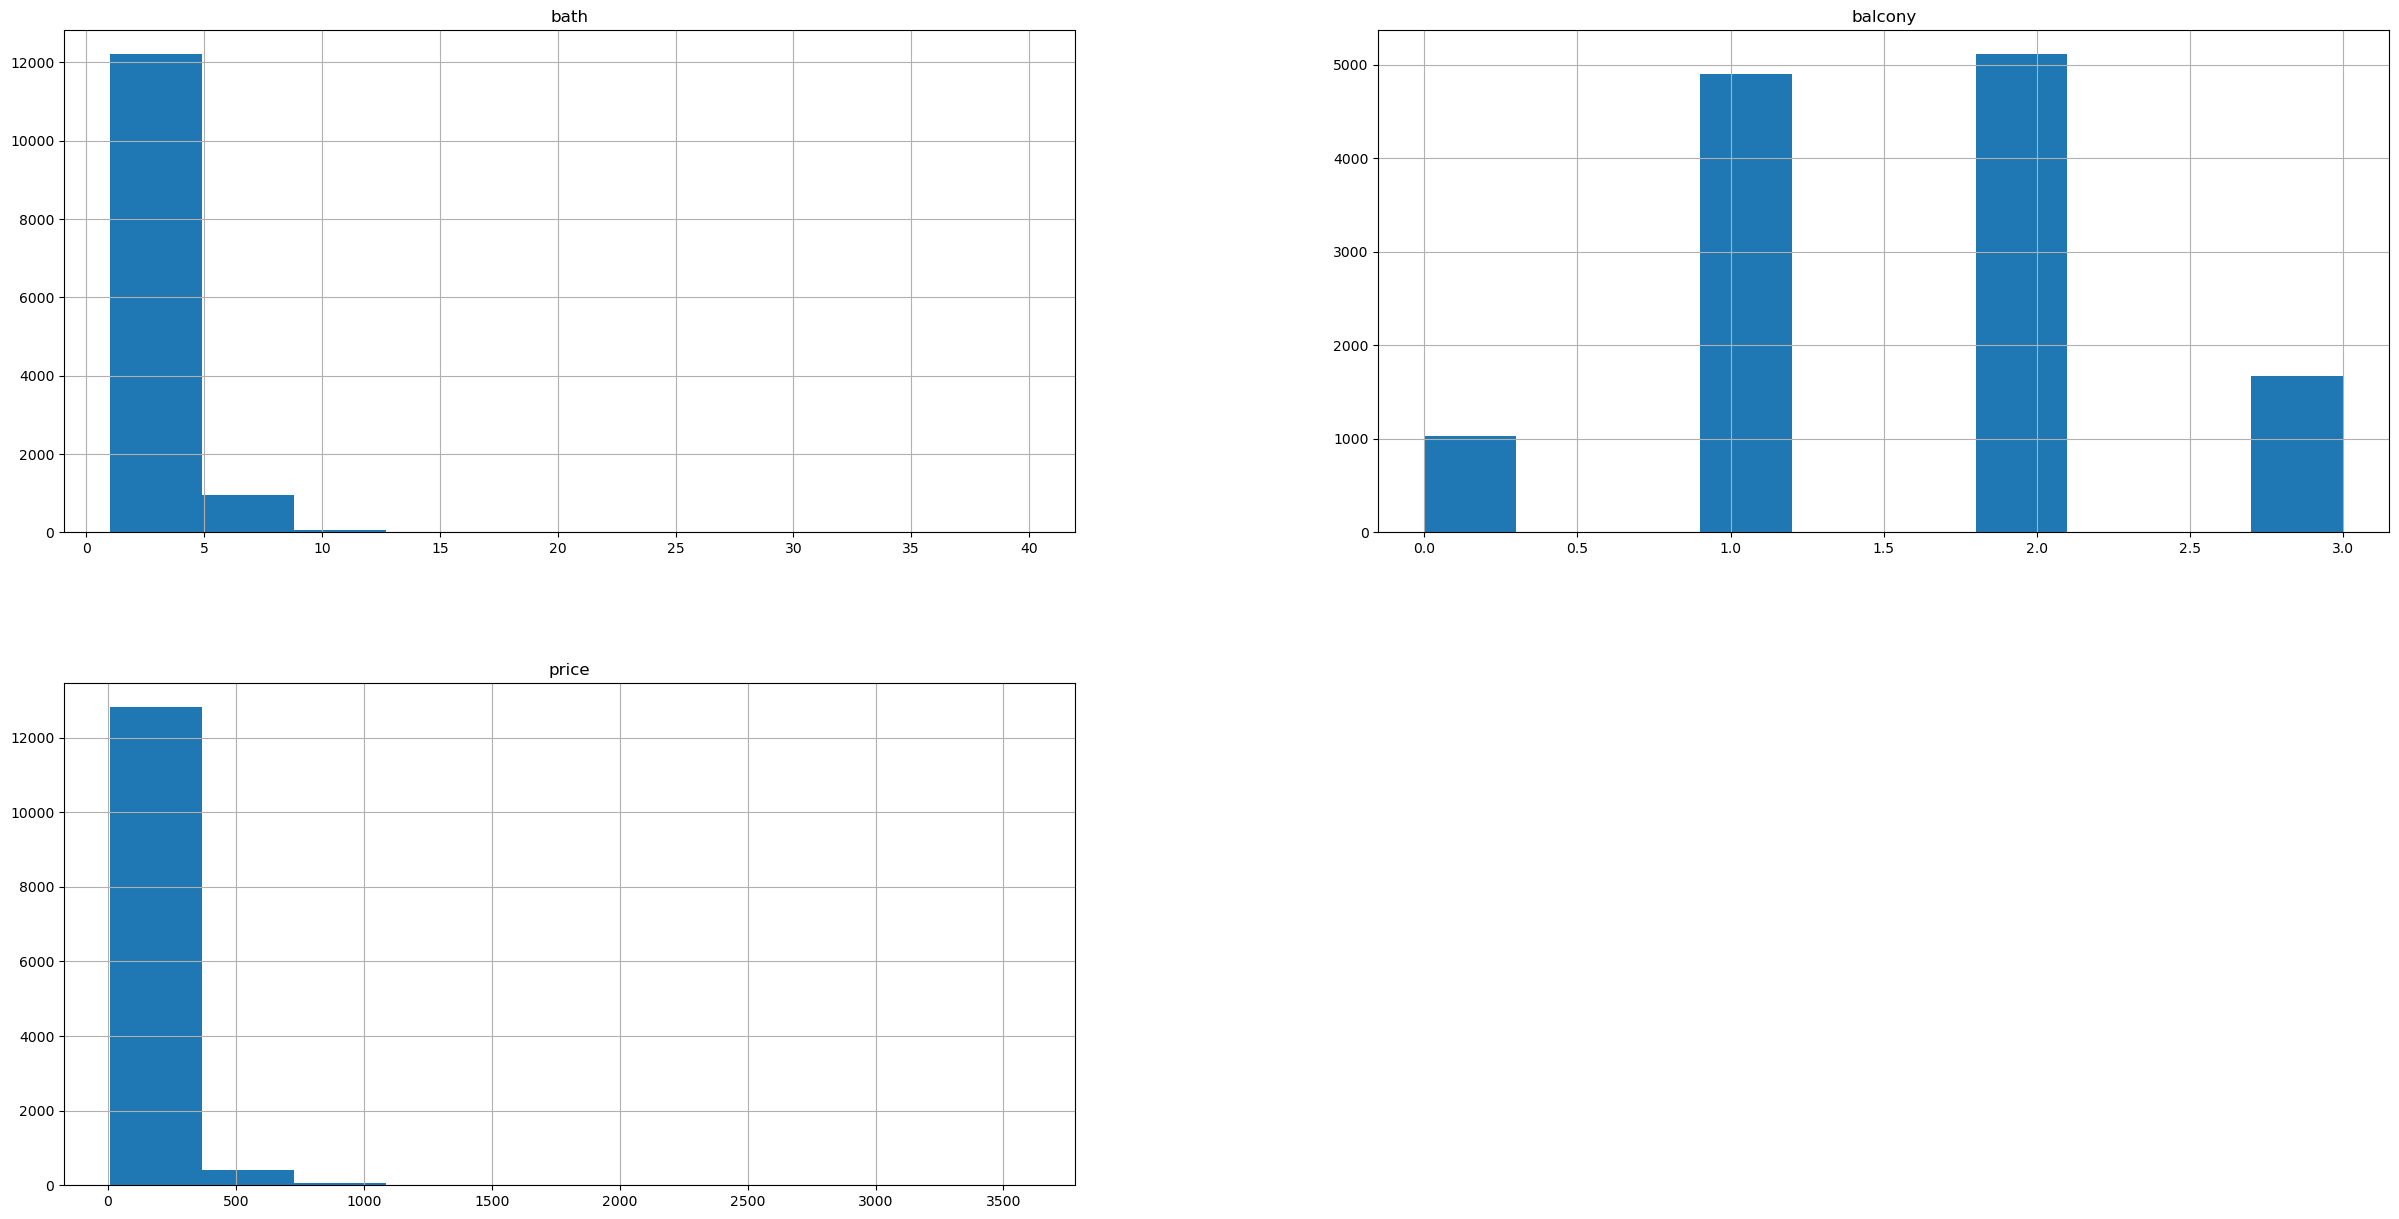

In [65]:
freqgraph = data.select_dtypes(include = 'float64')
freqgraph.hist(figsize=(30,15))
plt.show()

In [66]:
for col in ['balcony','bath']:
    data[col] = data[col].fillna(data[col].mean())

In [67]:
data['price'] = data['price'].fillna(data['price'].mean())

In [68]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

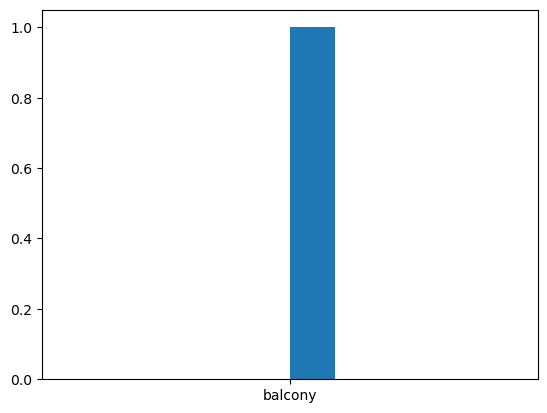

In [69]:
plt.hist('balcony')
plt.show()

In [70]:
#for col in ['bath','price']:
 #   data[col] = data[col].fillna(data[col].median())

In [71]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [72]:
for col in ['location','size','society']:
    data[col] = data[col].fillna(data[col].backfill())

In [73]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
society         1
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [74]:
data.loc[data['society'].isna()].index

Int64Index([13319], dtype='int64')

In [75]:
data['society'] = data['society'].fillna(method = 'ffill')

In [76]:
data.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [77]:
num_cols = ['bath', 'balcony', 'price']

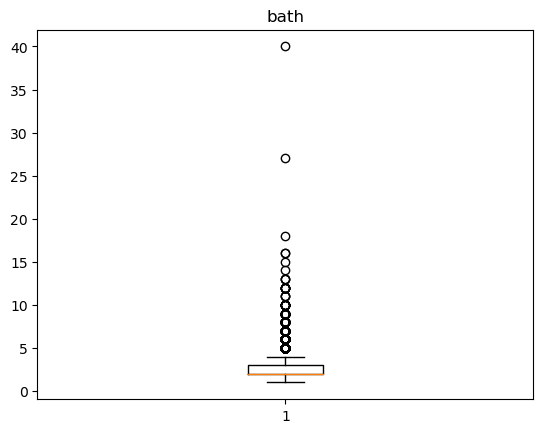

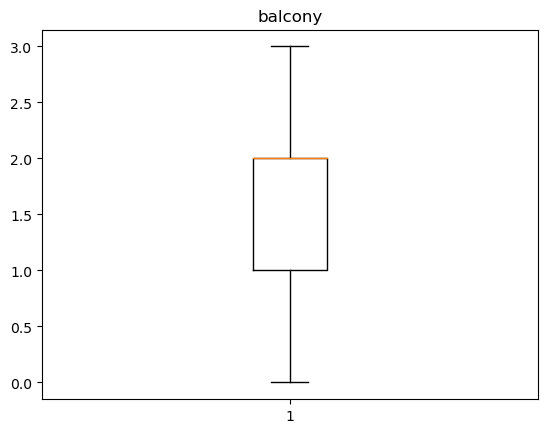

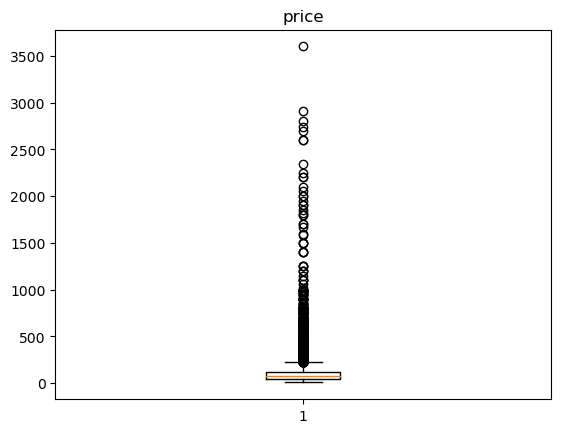

In [78]:
for  i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [79]:
Q1 = np.percentile(data['bath'],25,method = 'midpoint')
Q2 = np.percentile(data['bath'],55,method = 'midpoint')
Q3 = np.percentile(data['bath'],75,method = 'midpoint')

In [80]:
print('Q1' , Q1)
print('Q2' , Q2)
print('Q3' , Q3)

Q1 2.0
Q2 2.0
Q3 3.0


In [81]:
data['bath'].median()

2.0

In [82]:
IQR = Q3 -Q1

In [83]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5 * IQR

In [84]:
print('min is',low_lim)
print('max is', up_lim)

min is 0.5
max is 4.5


In [85]:
outlier = []
for x in data['bath']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [86]:
len(outlier)

1039